In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Define the nonlinear model function

In [2]:
def exponential_decay(x, A, k, C):
    return A * np.exp(-k * x) + C

Generate sample data

In [3]:
# Generate x data
x_data = np.linspace(0, 10, 50)

# Define the true parameters for our synthetic data
A_true = 5.0
k_true = 0.5
C_true = 1.0

# Generate y data based on the true parameters and add some random noise
y_data = exponential_decay(x_data, A_true, k_true, C_true) + 0.5 * np.random.normal(size=len(x_data))

Perform the non-linear fitting using *curve_fit*

In [4]:
# Provide an initial guess for the parameters (optional but recommended)
p0 = [4.0, 0.3, 0.5]

# Perform the curve fitting
popt, pcov = curve_fit(exponential_decay, x_data, y_data, p0=p0)

# Extract the fitted parameters
A_fit, k_fit, C_fit = popt

# Calculate the standard errors of the fitted parameters
perr = np.sqrt(np.diag(pcov))
A_err, k_err, C_err = perr

Print the ressults (for checking)

In [5]:
print(f"Fitted Parameters:")
print(f"A = {A_fit:.4f} +/- {A_err:.4f}")
print(f"k = {k_fit:.4f} +/- {k_err:.4f}")
print(f"C = {C_fit:.4f} +/- {C_err:.4f}")

# (Optional) If you used synthetic data, compare with true values
print("\nTrue Parameters (for comparison):")
print(f"A_true = {A_true}")
print(f"k_true = {k_true}")
print(f"C_true = {C_true}")

Fitted Parameters:
A = 4.7040 +/- 0.2884
k = 0.5062 +/- 0.0685
C = 1.1038 +/- 0.1321

True Parameters (for comparison):
A_true = 5.0
k_true = 0.5
C_true = 1.0


Plot the results using Matplotlib

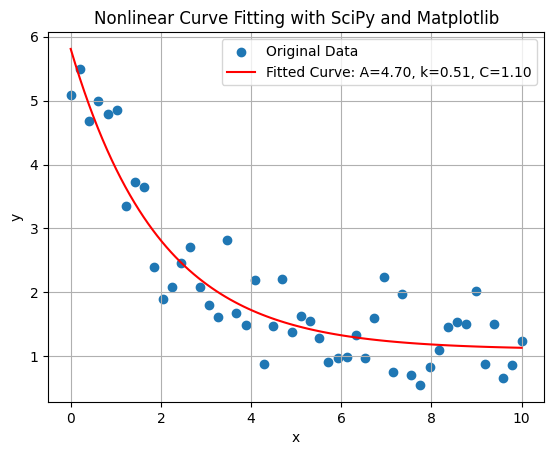

In [6]:
# Create a new set of x values for a smoother fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = exponential_decay(x_fit, *popt)

# Plot the original data
plt.scatter(x_data, y_data, label='Original Data')

# Plot the fitted curve
plt.plot(x_fit, y_fit, 'r-', label=f'Fitted Curve: A={A_fit:.2f}, k={k_fit:.2f}, C={C_fit:.2f}')

# Add labels and a title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nonlinear Curve Fitting with SciPy and Matplotlib')
plt.legend()
plt.grid(True)
plt.show()